In [133]:
class Euler:
    def __init__(self):
        pass   
    
    def step(self,ode,t,dt,u_0):
        u_1 = u_0 + dt*ode.rhs(t,u_0)
        return u_1
    
class EulerCromer:
    def __init__(self):
        pass   
    
    def step(self,ode,t,dt,u_0):
        rhs_new = ode.rhs(t,u_0)
        
        v_new = u_0[1] + dt*rhs_new[1]
        x_new = u_0[0] + dt*v_new
        
        u_1 = np.array((x_new, v_new))
        return u_1

class oscilator:
    def __init__(self,g=-9.81, c = 0, m = 1):
        self.n_dof = 4
        self.g = g
        self.c = c
        self.m = m

    
    def rhs(self,t,u):
        # u is [x,v]
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = -u[0]

        return dudt

class Integrator:
    def __init__(self,ode,method):
        self.ode = ode
        self.method = method
        self.calc_energies = []
        
    def integrate(self,interval,dt,u_0):
        t_0 = interval[0]
        t_end = interval[1]
        
        times = [t_0]
        states = [u_0]

        #calculated_energy = (1/2)*u_0[1]**2 + (1/2)*u_0[0]**2 - (1/2)
        #self.calc_energies.append(calculated_energy)
        
        t = t_0
        while t<t_end:
            dt_ = min(dt,t_end-t)
            
            
            
            u_1 = self.method.step(self.ode,t,dt_,u_0)
            
            t = t + dt_
            u_0 = u_1
            
            calculated_energy = np.absolute((1/2)*u_0[1]**2 + (1/2)*u_0[0]**2 - (1/2))
            avg_array = np.copy(self.calc_energies)
            avg_array = np.append(avg_array, calculated_energy)
            averaged_energy = np.average(avg_array)
            self.calc_energies.append(calculated_energy)

            times.append(t)
            states.append(u_1)
            
        return np.array(times),np.array(states), np.array(self.calc_energies)

In [140]:
# problem 2: Conservation of energy
import numpy as np
import matplotlib.pyplot as plt

osc = oscilator()
method = Euler()
integrator = Integrator(osc,method)

t_0 = 0.0
t_end = 100#2*np.pi
dt = 0.01
u_start = [1,0] # x, v

delta_t = np.array([1e-3, 1e-2, 1e-1])
eulerErrors = []
cronerErrors = []

for step in delta_t:
    dt = step
    t_end = 2*np.pi
    t,u, energies = integrator.integrate([t_0,t_end],dt,np.array(u_start))
    eulerErrors.append((energies[-1]))

method = EulerCromer()
for step in delta_t:
    dt = step
    t_end = 2*np.pi
    t,u, energies = integrator.integrate([t_0,t_end],dt,np.array(u_start))
    cronerErrors.append((energies[-1]))


#t,u, energies = integrator.integrate([t_0,t_end],dt,np.array(u_start))

plt.loglog(delta_t,cronerErrors, label='Euler Cromer', )
plt.loglog(delta_t,eulerErrors, '-.', label='Euler', )

plt.legend()
plt.title('Energy error')
plt.ylabel('Energy')
plt.xlabel('delta T')


- euler v at current time (u + du)

- eulercrome computes v at next time step (calculate rhs), new v = old + rhs * time


Text(0, 0.5, 'Temperature')

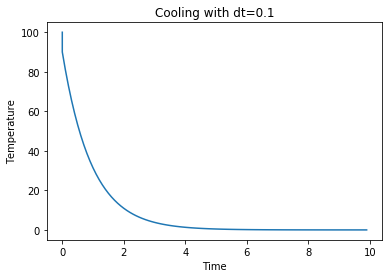

In [ ]:
# Problem 3: cooling constant

# 1
def rhs(r, T, T_s):
    dTdt = -r * (T - T_s)
    return dTdt
T_0 = 100
T_s = 0
r = 1

temps = [T_0]
times = [0]

t_start = 0
t_end = 10
dt = 0.1
loops = t_end / dt

for i in range(int(loops)):
    change = rhs(r,temps[-1], T_s)
    currentTemp = temps[-1] + change * dt
    temps.append(currentTemp)
    times.append(i*dt)
    
plt.plot(times,temps)
plt.title('Cooling with dt=0.1')
plt.xlabel('Time')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

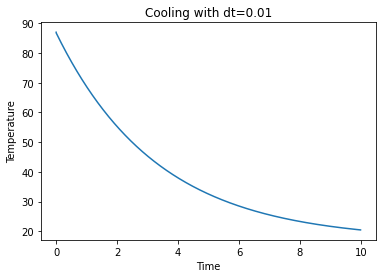

In [ ]:
# 2
def rhs(r, T, T_s):
    dTdt = -r * (T - T_s)
    return dTdt
T_0 = 87
T_s = 17
r = 0.3

temps = [T_0]
times = [0]

t_start = 0
t_end = 10
dt = 0.01
loops = t_end / dt

for i in range(int(loops)):
    change = rhs(r,temps[-1], T_s)
    currentTemp = temps[-1] + change * dt
    temps.append(currentTemp)
    times.append(i*dt)
    
plt.plot(times,temps)
plt.title('Cooling with dt=0.01')
plt.xlabel('Time')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

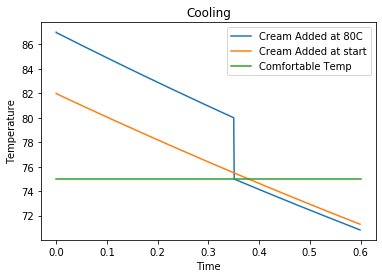

In [ ]:
# 3
def rhs(r, T, T_s):
    dTdt = -r * (T - T_s)
    return dTdt
T_0 = 87
T_s = 17
r = 0.3

temps = [T_0]
temps_cooled = [T_0 - 5]
times = [0]

t_start = 0
t_end = 0.6
dt = 0.001
loops = t_end / dt
cream_added = False
# add cream at 80
for i in range(int(loops)):
    change = rhs(r,temps[-1], T_s)
    currentTemp = temps[-1] + change * dt
    if (currentTemp <= 80 and cream_added==False):
        currentTemp -= 5
        cream_added = True
    temps.append(currentTemp)
    times.append(i*dt)

# add cream at start
for i in range(int(loops)):
    change = rhs(r,temps_cooled[-1], T_s)
    currentTemp = temps_cooled[-1] + change * dt
    temps_cooled.append(currentTemp)

plt.plot(times,temps, label='Cream Added at 80C')
plt.plot(times,temps_cooled, label='Cream Added at start')
plt.plot([0,0.6],[75,75],label='Comfortable Temp' )
plt.legend()
plt.title('Cooling')
plt.xlabel('Time')
plt.ylabel('Temperature')